In [1]:
import cv2
import os
import keras
import numpy as np
import pandas as pd
from keras.applications.resnet50 import ResNet50

In [2]:
from keras.models import load_model
from PIL import Image

In [3]:
model = load_model('./test.h5')

In [4]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [5]:
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
img = [read('./4.jpg')]
img_arr = np.array(img[0],dtype='uint8')

In [6]:
img_arr.shape

(335, 493, 3)

In [7]:
img_arr = img_arr/255.0

In [8]:
def resize_image(img, size=(28,28)):

    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1

    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)

    dif = h if h > w else w

    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC

    x_pos = (dif - w)//2
    y_pos = (dif - h)//2

    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]

    return cv2.resize(mask, size, interpolation)
img_arr = resize_image(img_arr,(224,224))

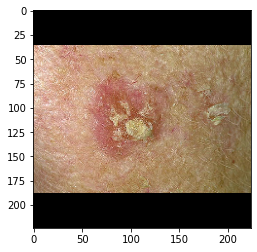

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img_arr)

In [11]:
new_img = np.resize(img_arr,(1,)+(224, 224, 3))
print(new_img.shape,new_img.ndim)

(1, 224, 224, 3) 4


In [12]:
model.predict(new_img)

array([[4.900569e-06, 9.999951e-01]], dtype=float32)